In [ ]:
# Aikasarjojen ryhmittely jatkuu...

JAMK examples #5: 05_ts_sales_data_categories

Sisältää mm.

- dt-accessorin käyttö

Ladataan käytettävät paketit.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Luetaan käytettävä aineisto:

In [2]:
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/sales_data.csv"
df = pd.read_csv(csvUrl)

df.dtypes

date                object
category            object
sales                int64
price              float64
customer_age         int64
customer_gender     object
dtype: object

Muunnetaan date-sarake aikaleimaksi.

In [3]:
# Convert the 'date' column to the datetime
df['date'] = pd.to_datetime(df['date'])

### dt-accessor

Kun muuttujan tietotyyppi on aikaleima (datetime64), niin sarakkeen [dt-accessorin](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors) avulla päästään tosi kätevästi kiinni aikaleiman ominaisuuksiin, kuten päivä, kuukausi, tunti... 

In [7]:
df['date'].dt.month

0      2
1      5
2      2
3      5
4      3
      ..
995    5
996    1
997    3
998    5
999    4
Name: date, Length: 1000, dtype: int64

Lasketaan tuoteryhmäkohtaisesti päivittäiset myynnit. Lopputulemana halutaan kehikko, jossa:

- tuoteryhmä, päivä ja myynti näkyvät omina muuttujinaan 
- indeksinä käytetään juoksevaa numerointia

Alkuperäisessä materiaalissa käytetää apuna [pd.Grouper -avustajaa](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html), mutta samaan lopputulemaan päästään myös dt-accessorin avulla. Huom! pd.Grouper:ia voi käyttää myös muiden tietotyyppien kanssa..

In [8]:
daily_sales =  df.resample('D', on='date')['sales'].sum().reset_index()

tähän jääätiiiiiin

In [18]:
# Group the data by category and day, calculate total sales, and reset index
# daily_sales_by_category = df.groupby(['category', pd.Grouper(key='date', freq='D')])['sales'].sum(numeric_only=True).reset_index()
daily_sales_by_category =df.groupby(['category', df['date'].dt.date])['sales'].sum(numeric_only=True).reset_index()
daily_sales_by_category

,category,date,sales
0,Books,2023-01-03,6
1,Books,2023-01-04,11
2,Books,2023-01-06,9
3,Books,2023-01-07,14
4,Books,2023-01-08,1
...,...,...,...
529,Phones,2023-06-21,2
530,Phones,2023-06-25,26
531,Phones,2023-06-26,20
532,Phones,2023-06-28,6


Lisätään päivittäisen kokonaistuoton sisältävä sarake.

In [20]:
# Calculate the daily revenue
df['revenue'] = df['sales'] * df['price']
df.head(3)

,date,category,sales,price,customer_age,customer_gender,revenue
0,2023-02-18,Clothing,17,65.53,31,Male,1114.01
1,2023-05-26,Books,18,431.78,26,NaN,7772.04
2,2023-02-17,Books,15,400.98,31,Female,6014.70


Lasketaan seuraavaksi päivittäiset kokonaismyynnit.

Käytetään jälleen oppaan esimerkin sijasta dt.accessoria...

In [26]:
# Resample the data by day and calculate the total revenue
# daily_revenue = df.resample('D', on='date')['revenue'].sum().reset_index()
daily_revenue = df.groupby(df['date'].dt.date)['revenue'].sum().reset_index()
daily_revenue.head(3)

,date,revenue
0,2023-01-01,11889.60
1,2023-01-02,9817.92
2,2023-01-03,6106.02


Päivittäiset kokonaismyynnit tuoteryhmittäin.

In [33]:
# daily_revenue_by_category = df.groupby(['category', pd.Grouper(key='date', freq='D')])['revenue'].sum(numeric_only=True).reset_index()
daily_revenue_by_category = df.groupby(['category', df['date'].dt.date])['revenue'].sum().reset_index()
daily_revenue_by_category.head(3)

,category,date,revenue
0,Books,2023-01-03,989.88
1,Books,2023-01-04,5026.45
2,Books,2023-01-06,2648.16


### Visualisointi

Tulostetaan tuoteryhmien päivittäisen myynnin kehitystä kuvaava käppyrähässäkkä.

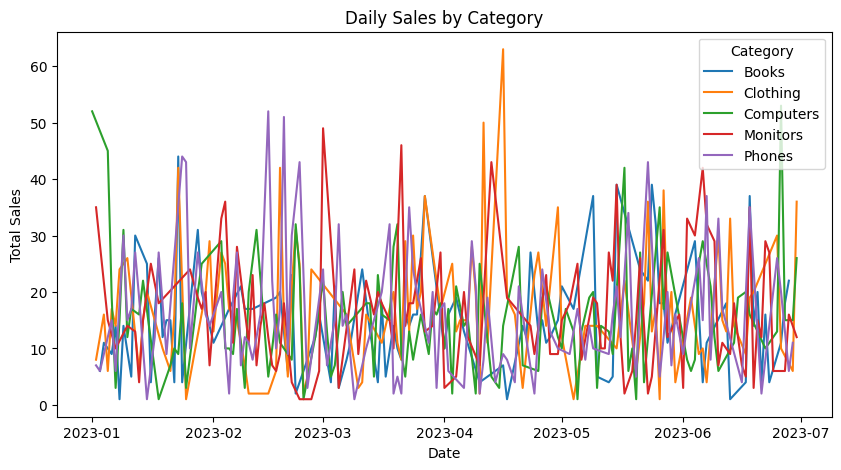

In [35]:
# visualize the daily sales by category with different lines for each category:
plt.figure(figsize=(10, 5))

sns.lineplot(x='date', y='sales', hue='category', data=daily_sales_by_category)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales by Category')
plt.legend(title='Category')
plt.show()

Lopuksi samanlainen kuva päivittäisille tuotoille...

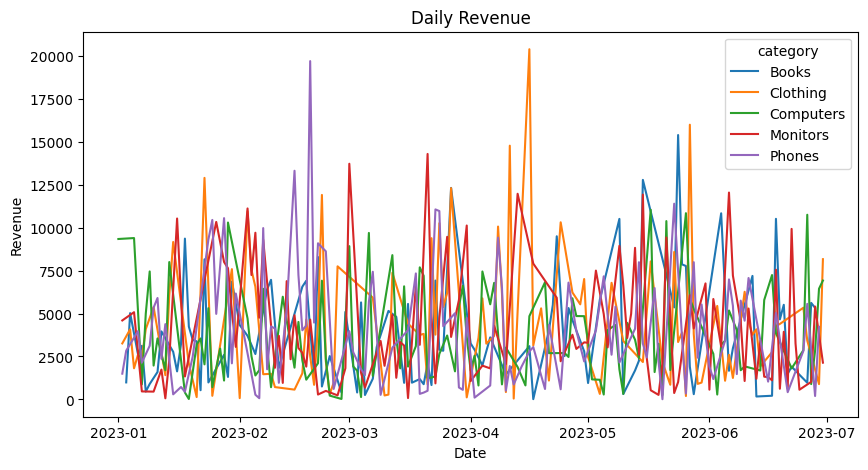

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='revenue', hue='category', data=daily_revenue_by_category)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.show()